In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def convertGenotypeToInt(genotype):
	out = 0
	for bit in genotype:
		out = (out << 1) | bit
	return out
def convertIntToGenotype(anInt, pad):
	offset = 2**pad
	return [int(x) for x in bin(offset+anInt)[3:]]	

In [3]:
df_raw = pd.read_csv('weinreich_temp.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'weinreich_temp.csv'

In [4]:
df_raw

,Unnamed: 0,G4205A,A42G,E104K,M182T,G238S,MIC_20,MIC_25,MIC_30,MIC_35,MIC_37,MIC_41
0,NaN,-,-,-,-,-,11.300,5.650,2.000,0.175,0.090,0.015635
1,NaN,-,-,-,-,+,724.450,256.125,256.125,2.000,1.000,0.175000
2,NaN,-,-,-,+,-,11.300,8.000,4.000,0.125,0.125,0.020000
3,NaN,-,-,-,+,+,724.450,256.125,512.250,64.030,90.550,5.650000
4,NaN,-,-,+,-,-,22.650,11.300,11.300,0.175,0.250,0.090000
5,NaN,-,-,+,-,+,4098.000,2049.000,2897.700,362.200,45.300,1.400000
6,NaN,-,-,+,+,-,16.010,11.300,16.010,0.250,0.250,0.125000
7,NaN,-,-,+,+,+,8096.000,4098.000,4098.000,1448.700,1024.500,362.200000
8,NaN,-,+,-,-,-,16.010,5.650,5.650,0.090,0.125,0.045000
9,NaN,-,+,-,-,+,1024.500,724.450,724.450,128.060,181.100,5.650000


In [5]:
df=pd.DataFrame(columns=['Temp','MIC','Genotype'])
df['Genotype']=np.repeat(lst,6,axis=0).tolist()
temps=np.array([20,25,30,35,37,41])
df['Temp'] =np.repeat([temps],2**5,axis=0).flatten()
df['MIC'] = df_raw.iloc[:-1,6:].values.flatten()
df['Genotype_Int'] = [convertGenotypeToInt(l) for l in df['Genotype']]

NameError: name 'lst' is not defined

In [6]:
g = sns.lineplot('Temp','MIC',data=df,hue='Genotype_Int')
g.set_yscale('log')

ValueError: Could not interpret input 'Genotype_Int'

In [7]:
pal[0]


NameError: name 'pal' is not defined

In [8]:

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})



# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Genotype_Int",hue= "Genotype_Int",aspect=6, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.lineplot ,'Temp','MIC', alpha=1,color=pal[1]).set(yscale ='log',ylim=(0.01, 10000))
#g.map(plt.fill_between ,'Temp','MIC', alpha=1,color=pal[1]).set(yscale ='log',ylim=(0.01, 10000))
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0.01, lw=2,color='k', clip_on=False,alpha=.5)


#Define and use a simple function to label the plot in axes coordinates
def label(x,color, label):
    ax = plt.gca()
    ax.text(1, .2, convertIntToGenotype(int(label),5), fontweight="bold",color='k',
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Genotype_Int")
ax = g.facet_axis(-1,0)
ax.set_xlabel('Temperature $^{\circ}$ C')


# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.3)

# Remove axes details that don't play well with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True)



ax = g.facet_axis(0,0)
ax.set_ylabel('MIC')



g.savefig('weinreich_ridge.pdf',facecolor=ax.get_facecolor(), edgecolor='none' )

KeyError: 'Genotype_Int'

In [9]:
lst = list(itertools.product([0,1],repeat=5))

NameError: name 'itertools' is not defined

In [10]:
df['MIC'].max()

nan

In [11]:
G = nx.hypercube_graph(5)

In [13]:
pos = {(0,0,0,0,0): [.5,1],
       (1,0,0,0,0): [.1,.8],(0,1,0,0,0): [.3,.8],(0,0,1,0,0): [.5,.8],(0,0,0,1,0): [.7,.8],(0,0,0,0,1): [.9,.8],
      (1,1,0,0,0):[.05,.6],(1,0,1,0,0):[.15,.6],(1,0,0,1,0):[.25,.6],(1,0,0,0,1):[.35,.6],(0,1,1,0,0):[.45,.6],(0,1,0,1,0):[.55,.6],(0,1,0,0,1):[.65,.6],(0,0,1,1,0):[.75,.6],(0,0,1,0,1):[.85,.6],(0,0,0,1,1):[.95,.6],
      (1,1,1,0,0):[.05,.4],(1,1,0,1,0):[.15,.4],(1,1,0,0,1):[.25,.4],(1,0,1,1,0):[.35,.4],(1,0,1,0,1):[.45,.4],(1,0,0,1,1):[.55,.4],(0,1,1,1,0):[.65,.4],(0,1,1,0,1):[.75,.4],(0,1,0,1,1):[.85,.4],(0,0,1,1,1):[.95,.4],
      (1,1,1,1,0):[.1,.2],(1,1,1,0,1):[.3,.2],(1,1,0,1,1):[.5,.2],(1,0,1,1,1):[.7,.2],(0,1,1,1,1):[.9,.2],
      (1,1,1,1,1):[.5,0]}

KeyError: 'Genotype_Int'

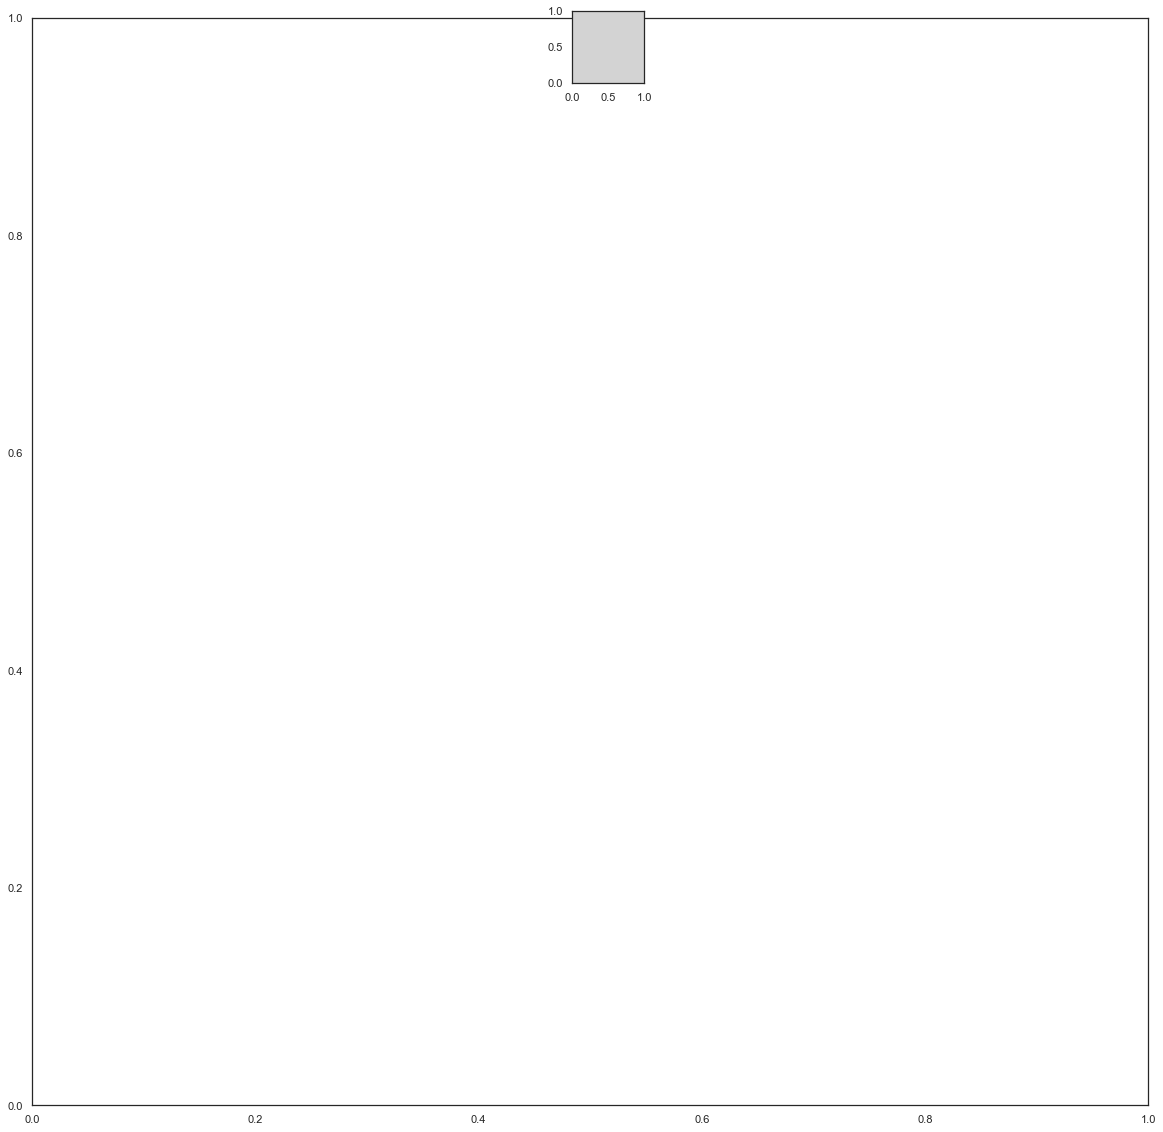

In [14]:
fig,ax=plt.subplots(figsize=(20,20))

for node in G:
    plt.axes([pos[node][0]+(.5-pos[node][0])*.2,pos[node][1] +(.45-pos[node][1])*.3 , .05, .05], 
             facecolor='lightgray')
    plt.plot(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),lw=4)
    plt.ylim(-6,14)
    plt.title(str(node),fontsize=15)
    plt.grid(color='w')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if node == (0,0,0,0,0):
        plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
        plt.ylabel('$\log_2 MIC$',fontsize=15)
    #ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='gray')
plt.savefig('hypercube_ridge.png')

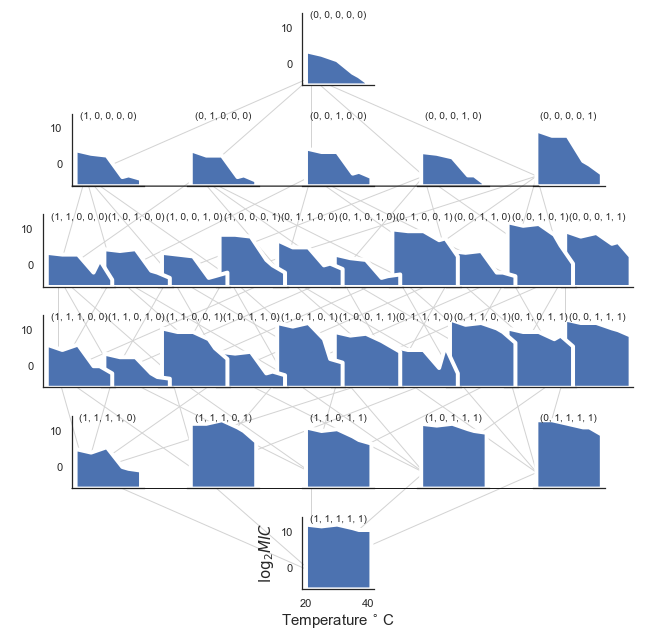

In [583]:
fig,ax=plt.subplots(figsize=(10,10))
nx.draw(G,pos=pos,node_size=0,ax=ax,edge_color='lightgray')
for node in G:
    ax=fig.add_axes([pos[node][0]+(.5-pos[node][0])*.2,pos[node][1] +(.45-pos[node][1])*.3 , .1, .1], 
             #facecolor='lightgray'
            )
    ax.fill_between(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],-6,
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),lw=4)
    ax.plot(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'Temp'],
             np.log2(df.loc[df['Genotype_Int'] ==convertGenotypeToInt(node),'MIC']),'w')
    ax.set_ylim(-6,14)
    ax.set_title(str(node),fontsize=10,y=.85)
    #plt.grid(color='w')
    
    
    ax.set_xticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if node != (0,0,0,0,0) and node != (1,1,1,1,1) and node != (1,0,0,0,0) and node != (1,1,0,0,0) and node != (1,1,1,0,0) and node !=(1,1,1,1,0):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
        ax.set_xticks([20,40])
        ax.set_xticklabels([])
    #else:
        #ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        

    

    if node == (1,1,1,1,1):
        ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        ax.set_ylabel('$\log_2 MIC$',fontsize=15)
        ax.set_xlabel('Temperature $^{\circ}$ C',fontsize=15)
        ax.set_xticks([20,40])
        ax.set_xticklabels([20,40])
        #ax.text(.5,-.1,'Temperature $^{\circ}$ C')
        #ax.text(.4,.1,'$\log_2 MIC$',rotation=90)
    #    plt.xlabel('Temperature $^{\circ}$ C',fontsize=15)
    #    plt.gca().axison = True
    #    plt.ylabel('$\log_2 MIC$',fontsize=15)
    #ax= fig.add_subplot([*pos[node],.2,.2],zorder=-10)
plt.arrow(-55,105.9,150,0,clip_on=False,zorder=10,lw=.6,color='k')

plt.arrow(-55,21.9,150,0,clip_on=False,zorder=10,lw=.6,color='k')
plt.savefig('hypercube_ridge2.pdf')

In [1]:

vmin=np.log2(df['MIC']).min()
vmax=np.log2(df['MIC']).max()
peaks = [[6,12,14],[14,23,29],[14,23,29,6],[14,29,31],[14],[31]]
for ax,t,peak in zip(axs.flatten(),df['Temp'].unique(),peaks):
    #labe = nx.draw_networkx_labels(G,pos=pos,ax=ax)

    
    ax.text(.6,1,'%d $^{\circ}$ C ' % (t),fontsize=15)
    nx.draw(G,pos=pos,edge_color='gray',edgecolors=np.repeat('k',2**5),cmap=plt.cm.Blues,node_color=np.log2(df.loc[df['Temp']==t,'MIC']),ax=ax)
    
fig.subplots_adjust(hspace=-.05)
fig.subplots_adjust(wspace=.05)
cax = fig.add_axes([0.9, 0.1, 0.01, 0.5])
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm,cax=cax,)
cbar.set_label('$\log_2 MIC$', rotation=270,labelpad=20)
plt.savefig('hypercube_all_graphs.pdf')

NameError: name 'plt' is not defined

In [584]:
df

,Temp,MIC,Genotype,Genotype_Int
0,20,11.300000,"[0, 0, 0, 0, 0]",0
1,25,5.650000,"[0, 0, 0, 0, 0]",0
2,30,2.000000,"[0, 0, 0, 0, 0]",0
3,35,0.175000,"[0, 0, 0, 0, 0]",0
4,37,0.090000,"[0, 0, 0, 0, 0]",0
5,41,0.015635,"[0, 0, 0, 0, 0]",0
6,20,724.450000,"[0, 0, 0, 0, 1]",1
7,25,256.125000,"[0, 0, 0, 0, 1]",1
8,30,256.125000,"[0, 0, 0, 0, 1]",1
9,35,2.000000,"[0, 0, 0, 0, 1]",1


In [427]:
pos

{(0, 0, 0, 0, 0): 'k',
 (0, 0, 0, 0, 1): 'k',
 (0, 0, 0, 1, 0): 'k',
 (0, 0, 0, 1, 1): 'k',
 (0, 0, 1, 0, 0): 'k',
 (0, 0, 1, 0, 1): 'k',
 (0, 0, 1, 1, 0): 'k',
 (0, 0, 1, 1, 1): 'k',
 (0, 1, 0, 0, 0): 'k',
 (0, 1, 0, 0, 1): 'k',
 (0, 1, 0, 1, 0): 'k',
 (0, 1, 0, 1, 1): 'k',
 (0, 1, 1, 0, 0): 'k',
 (0, 1, 1, 0, 1): 'k',
 (0, 1, 1, 1, 0): 'k',
 (0, 1, 1, 1, 1): 'k',
 (1, 0, 0, 0, 0): 'k',
 (1, 0, 0, 0, 1): 'k',
 (1, 0, 0, 1, 0): 'k',
 (1, 0, 0, 1, 1): 'k',
 (1, 0, 1, 0, 0): 'k',
 (1, 0, 1, 0, 1): 'k',
 (1, 0, 1, 1, 0): 'k',
 (1, 0, 1, 1, 1): 'k',
 (1, 1, 0, 0, 0): 'k',
 (1, 1, 0, 0, 1): 'k',
 (1, 1, 0, 1, 0): 'k',
 (1, 1, 0, 1, 1): 'k',
 (1, 1, 1, 0, 0): 'k',
 (1, 1, 1, 0, 1): 'k',
 (1, 1, 1, 1, 0): 'k',
 (1, 1, 1, 1, 1): 'k'}

In [ ]:
lst = 